# Load data

In [1]:
import xarray as xr

data_dir = 'D:/VScode/Last_deglaciation/data'
ds_sat_EOFs_or = xr.open_dataset(data_dir + '/ds_sat_EOFs.nc')

path='D:/VScode/Last_deglaciation/data/LGMR_SIC_May2023.nc'
ds_seaice_or = xr.open_dataset(path)
ds_seaice_or = ds_seaice_or.where(ds_seaice_or.age >= 11000, drop=True)

c:\Users\zps19\.conda\envs\pz-env\lib\site-packages\xarray\coding\variables.py:148: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
c:\Users\zps19\.conda\envs\pz-env\lib\site-packages\xarray\coding\variables.py:148: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv


In [2]:
# rename age dimension to time
ds_seaice = ds_seaice_or.rename({'age': 'time'})
# get the sic data of dims=1 and put it into a new xarray
ds_seaice = ds_seaice.isel(dims=1)

ds_sat_EOFs = ds_sat_EOFs_or.rename({'age': 'time'})


In [100]:
ds_seaice.info()

xarray.Dataset {
dimensions:
	time = 65 ;
	lat = 96 ;
	lon = 144 ;

variables:
	float32 sic(time, lat, lon) ;
		sic:FillValue = 9.969209968386869e+36 ;
		sic:long_name = Mean annual sea ice concentration ;
		sic:units = Fraction cover ;
	float32 lat(lat) ;
		lat:FillValue = 9.969209968386869e+36 ;
		lat:long_name = vector latitudes ;
		lat:units = degrees_north ;
	float32 lon(lon) ;
		lon:FillValue = 9.969209968386869e+36 ;
		lon:long_name = vector of longitudes ;
		lon:units = degrees_east ;
	float32 time(time) ;
		time:long_name = reconstruction bin mid-point (years BP) ;
	<U18 dims() ;
		dims:long_name = dimensions (mean--median--1sigma--2.5--97.5) ;

// global attributes:
}

In [101]:
ds_sat_EOFs.info()

xarray.Dataset {
dimensions:
	time = 65 ;
	lat = 96 ;
	lon = 144 ;

variables:
	float32 sat(time, lat, lon) ;
		sat:FillValue = 9.969209968386869e+36 ;
		sat:long_name = ENSEMBLE MEAN (n = 500) mean annual temperature at reference height ;
		sat:units = degrees Celsius ;
	float32 sat_std(time, lat, lon) ;
		sat_std:FillValue = 9.969209968386869e+36 ;
		sat_std:long_name = ENSEMBLE STANDARD DEVIATION (n = 500) mean annual temperature at reference height ;
		sat_std:units = degrees Celsius ;
	float32 lat(lat) ;
	float32 lon(lon) ;
		lon:FillValue = 9.969209968386869e+36 ;
		lon:long_name = vector of longitudes ;
		lon:units = degrees_east ;
	float32 time(time) ;
		time:long_name = reconstruction bin mid-point (years BP) ;
	float32 sat_centered(time, lat, lon) ;
	float32 weight(lat) ;
	float32 sat_centered_weighted(time, lat, lon) ;
	float32 EOF1(lat, lon) ;
	float32 EOF2(lat, lon) ;

// global attributes:
}

# Doing MCA on SAT and SIC data using xmac, which by default will center but not weight the data

ref: https://pypi.org/project/xmca/0.2.1/\
https://pyxmca.readthedocs.io/en/latest/


In [3]:
from xmca.xarray import xMCA  # xarray

mca = xMCA(ds_sat_EOFs['sat'], ds_seaice['sic'])
mca.apply_coslat()
mca.solve()

expvar = mca.explained_variance()

eofs  = mca.eofs()
pcs   = mca.pcs()

In [85]:
expvar

<xarray.DataArray 'covariance fraction' (mode: 65)>
array([8.3057793e+01, 1.2671299e+01, 1.6101176e+00, 7.4378872e-01,
       5.2443588e-01, 4.6889940e-01, 3.4223250e-01, 1.3837072e-01,
       8.9366801e-02, 8.3877929e-02, 4.8820406e-02, 3.5373647e-02,
       2.7924601e-02, 2.0080414e-02, 1.7729536e-02, 1.6229562e-02,
       1.5124050e-02, 1.0467039e-02, 8.8724094e-03, 7.2837290e-03,
       6.6197012e-03, 5.7945461e-03, 5.4708803e-03, 4.8454218e-03,
       4.2518354e-03, 3.5164151e-03, 3.1406577e-03, 2.8631568e-03,
       2.5627462e-03, 2.4048910e-03, 1.9455409e-03, 1.7315628e-03,
       1.6708237e-03, 1.4033258e-03, 1.2942267e-03, 1.2125926e-03,
       1.0124738e-03, 8.5673481e-04, 7.6348713e-04, 6.9481769e-04,
       6.6340639e-04, 6.5956725e-04, 6.2162202e-04, 5.5532681e-04,
       5.4140534e-04, 4.9365341e-04, 4.6507680e-04, 4.2266937e-04,
       3.6548733e-04, 3.4412093e-04, 3.1028109e-04, 2.9599681e-04,
       2.6842291e-04, 2.5738269e-04, 2.2872075e-04, 2.1668377e-04,
       2.0179055e-04, 1.8118197e-04, 1.7389329e-04, 1.5679037e-04,
       1.3047976e-04, 1.2561293e-04, 9.7748263e-05, 8.8429777e-05,
       2.7488077e-12], dtype=float32)
Coordinates:
  * mode     (mode) int32 1 2 3 4 5 6 7 8 9 10 ... 56 57 58 59 60 61 62 63 64 65
Attributes: (12/16)
    version:                   1.4.2
    is_bivariate:              True
    is_normalized:             False
    is_coslat_corrected:       True
    method:                    mca
    is_complex:                False
    ...                        ...
    power:                     0
    is_truncated:              False
    is_truncated_at:           65
    rank:                      65
    total_covariance:          17.579737
    total_squared_covariance:  218.27866

# Get EOFs and PCs

In [4]:
eofs['left'].shape
eofs_left=eofs['left'].values.reshape(96*144,65)
eofs_right=eofs['right'].values.reshape(96*144,65)

The eof 1 and eof 2 combined explained more than 95% variability so we only focused on the first two eofs

In [5]:
# Extract the first and second EOFs for sat and sic
EOF1_sat = eofs_left[:, 0].reshape(96, 144)
EOF2_sat = eofs_left[:, 1].reshape(96, 144)
EOF1_sic = eofs_right[:, 0].reshape(96, 144)
EOF2_sic = eofs_right[:, 1].reshape(96, 144)

In [6]:
pcs['left'].shape

(65, 65)

In [7]:
PC_sat1=pcs['left'][:,0]
PC_sat2=pcs['left'][:,1]

PC_sic1=pcs['right'][:,0]
PC_sic2=pcs['right'][:,1]

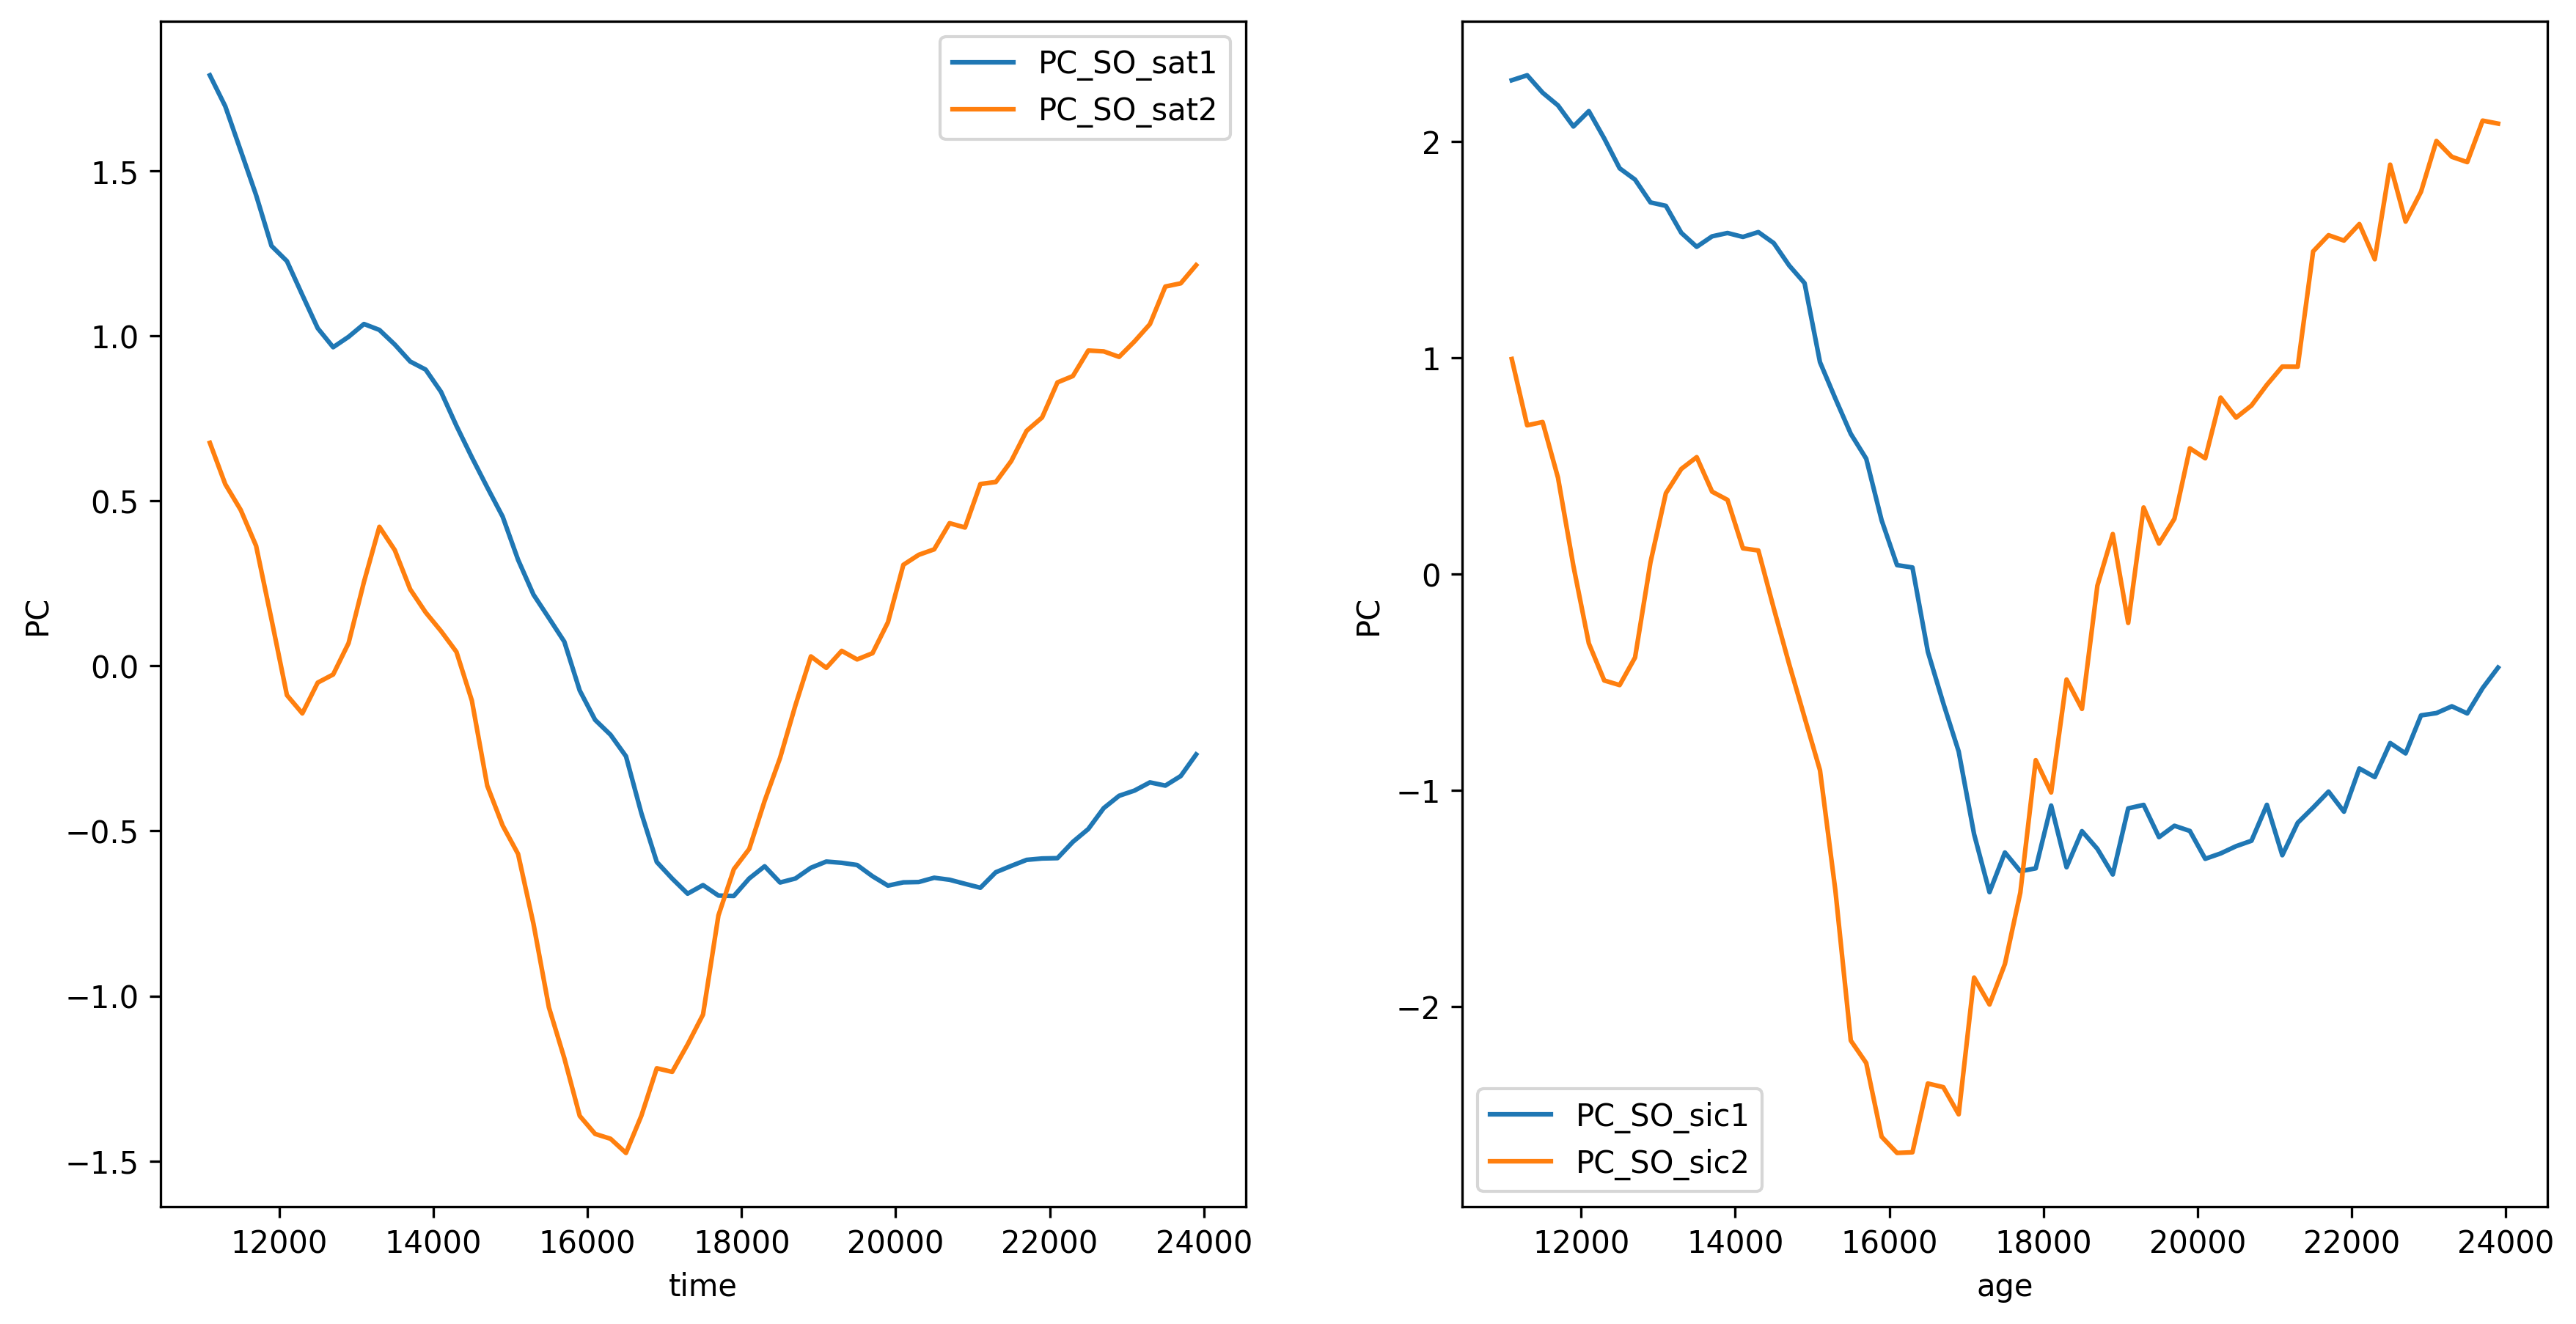

In [8]:
# plot the line plot of PC_SO_sat1 and PC_SO_sic1, and PC_SO_sat2 and PC_SO_sic2 side by side
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 2, figsize=(14, 7), dpi=300)

axs[0].plot(ds_sat_EOFs['time'], PC_sat1, label='PC_SO_sat1')
axs[0].plot(ds_sat_EOFs['time'], PC_sat2, label='PC_SO_sat2')
axs[0].set_xlabel('time')
axs[0].set_ylabel('PC')
axs[0].legend()

axs[1].plot(ds_seaice['time'], PC_sic1, label='PC_SO_sic1')
axs[1].plot(ds_seaice['time'], PC_sic2, label='PC_SO_sic2')
axs[1].set_xlabel('age')
axs[1].set_ylabel('PC')
axs[1].legend()

# Plot heatmap for EOFs

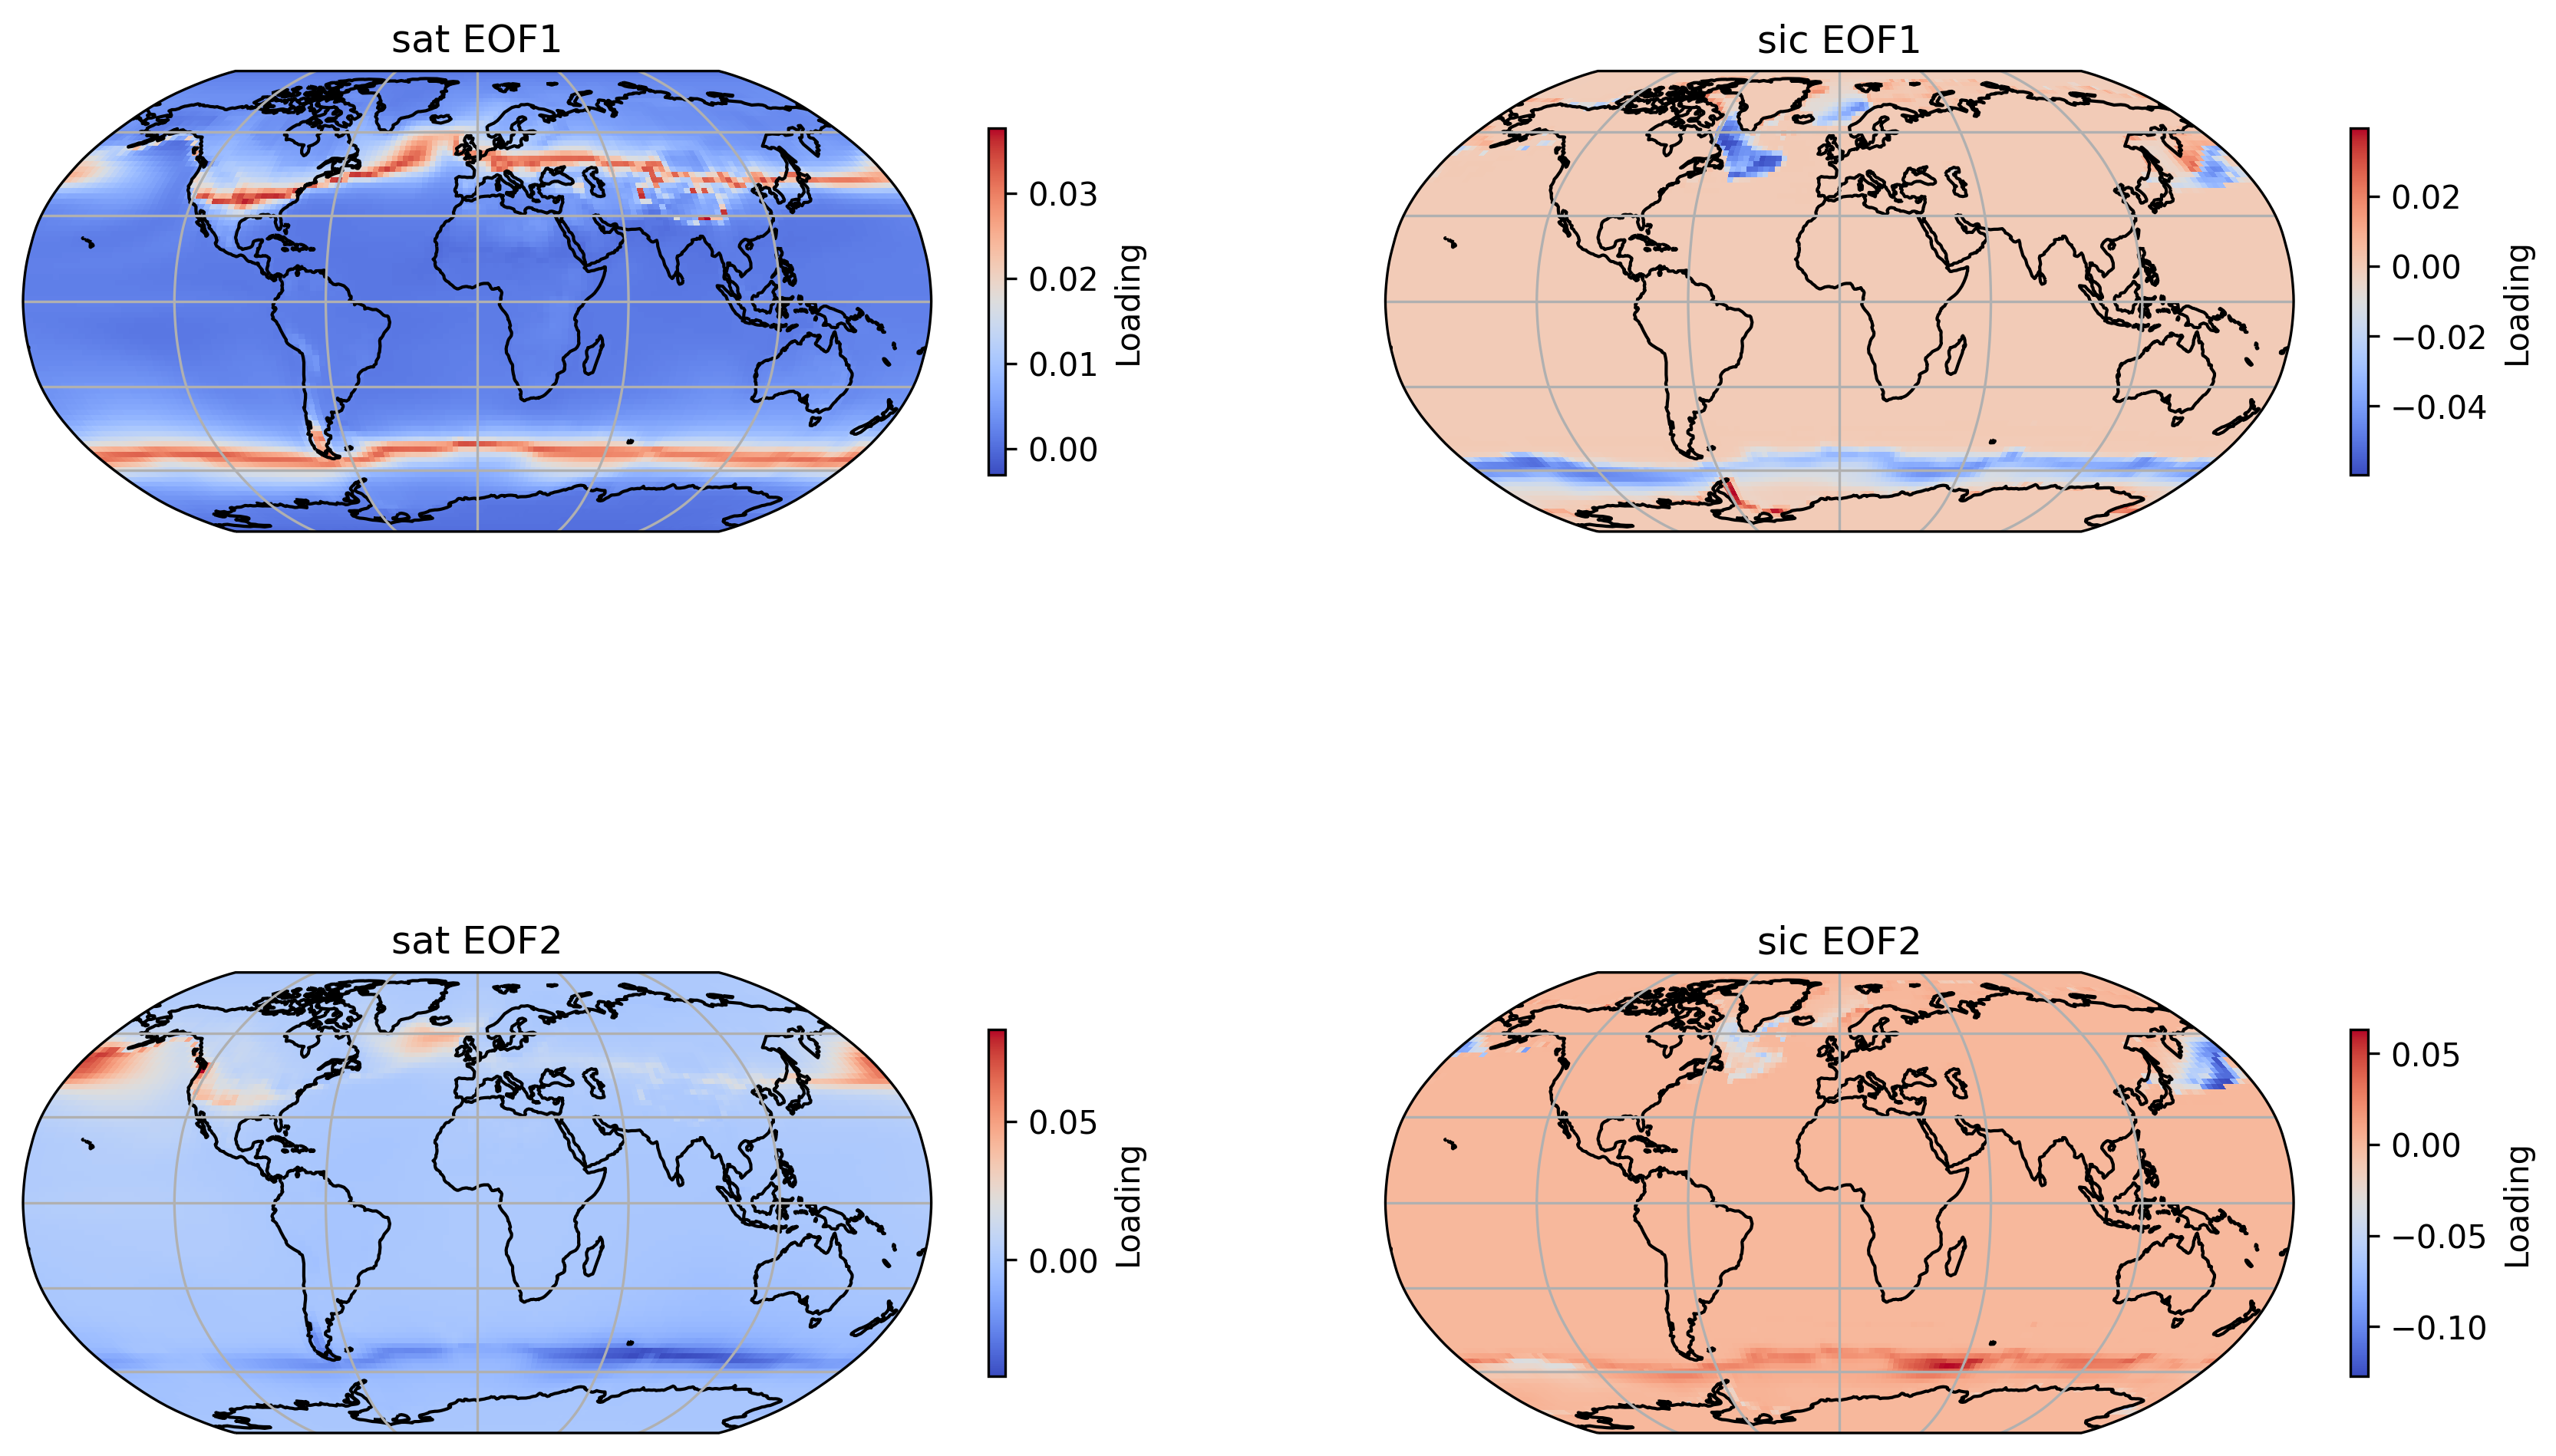

In [9]:

import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Create a figure and axes in a 2x2 grid
fig, axs = plt.subplots(2, 2, figsize=(14, 9), subplot_kw=dict(projection=ccrs.Robinson()), dpi=300)

# Set the colormap and bounds for the color scale
cmap = plt.cm.get_cmap('coolwarm')


# Plotting EOF1 for sat
ax = axs[0, 0]
ax.add_feature(cfeature.COASTLINE)
ax.gridlines(draw_labels=False)
im = ax.pcolormesh(ds_sat_EOFs.lon, ds_sat_EOFs.lat, EOF1_sat, transform=ccrs.PlateCarree(), cmap=cmap, shading='auto')
ax.set_title('sat EOF1')
cbar = plt.colorbar(im, ax=ax, orientation='vertical', pad=0.05, shrink=0.5)
cbar.ax.set_ylabel('Loading')

# Plotting EOF1 for sic
ax = axs[0, 1]
ax.add_feature(cfeature.COASTLINE)
ax.gridlines(draw_labels=False)
im = ax.pcolormesh(ds_seaice.lon, ds_seaice.lat, EOF1_sic, transform=ccrs.PlateCarree(), cmap=cmap,shading='auto')
ax.set_title('sic EOF1')
cbar = plt.colorbar(im, ax=ax, orientation='vertical', pad=0.05, shrink=0.5)
cbar.ax.set_ylabel('Loading')

# Plotting EOF2 for sat
ax = axs[1, 0]
ax.add_feature(cfeature.COASTLINE)
ax.gridlines(draw_labels=False)
im = ax.pcolormesh(ds_sat_EOFs.lon, ds_sat_EOFs.lat, EOF2_sat, transform=ccrs.PlateCarree(), cmap=cmap, shading='auto')
ax.set_title('sat EOF2')
cbar = plt.colorbar(im, ax=ax, orientation='vertical', pad=0.05, shrink=0.5)
cbar.ax.set_ylabel('Loading')

# Plotting EOF2 for sic
ax = axs[1, 1]
ax.add_feature(cfeature.COASTLINE)
ax.gridlines(draw_labels=False)
im = ax.pcolormesh(ds_seaice.lon, ds_seaice.lat, EOF2_sic, transform=ccrs.PlateCarree(), cmap=cmap, shading='auto')
ax.set_title('sic EOF2')
cbar = plt.colorbar(im, ax=ax, orientation='vertical', pad=0.05, shrink=0.5)
cbar.ax.set_ylabel('Loading')

# Adjust the space between subplots
fig.subplots_adjust(hspace=0.3, wspace=0.2)

plt.show()


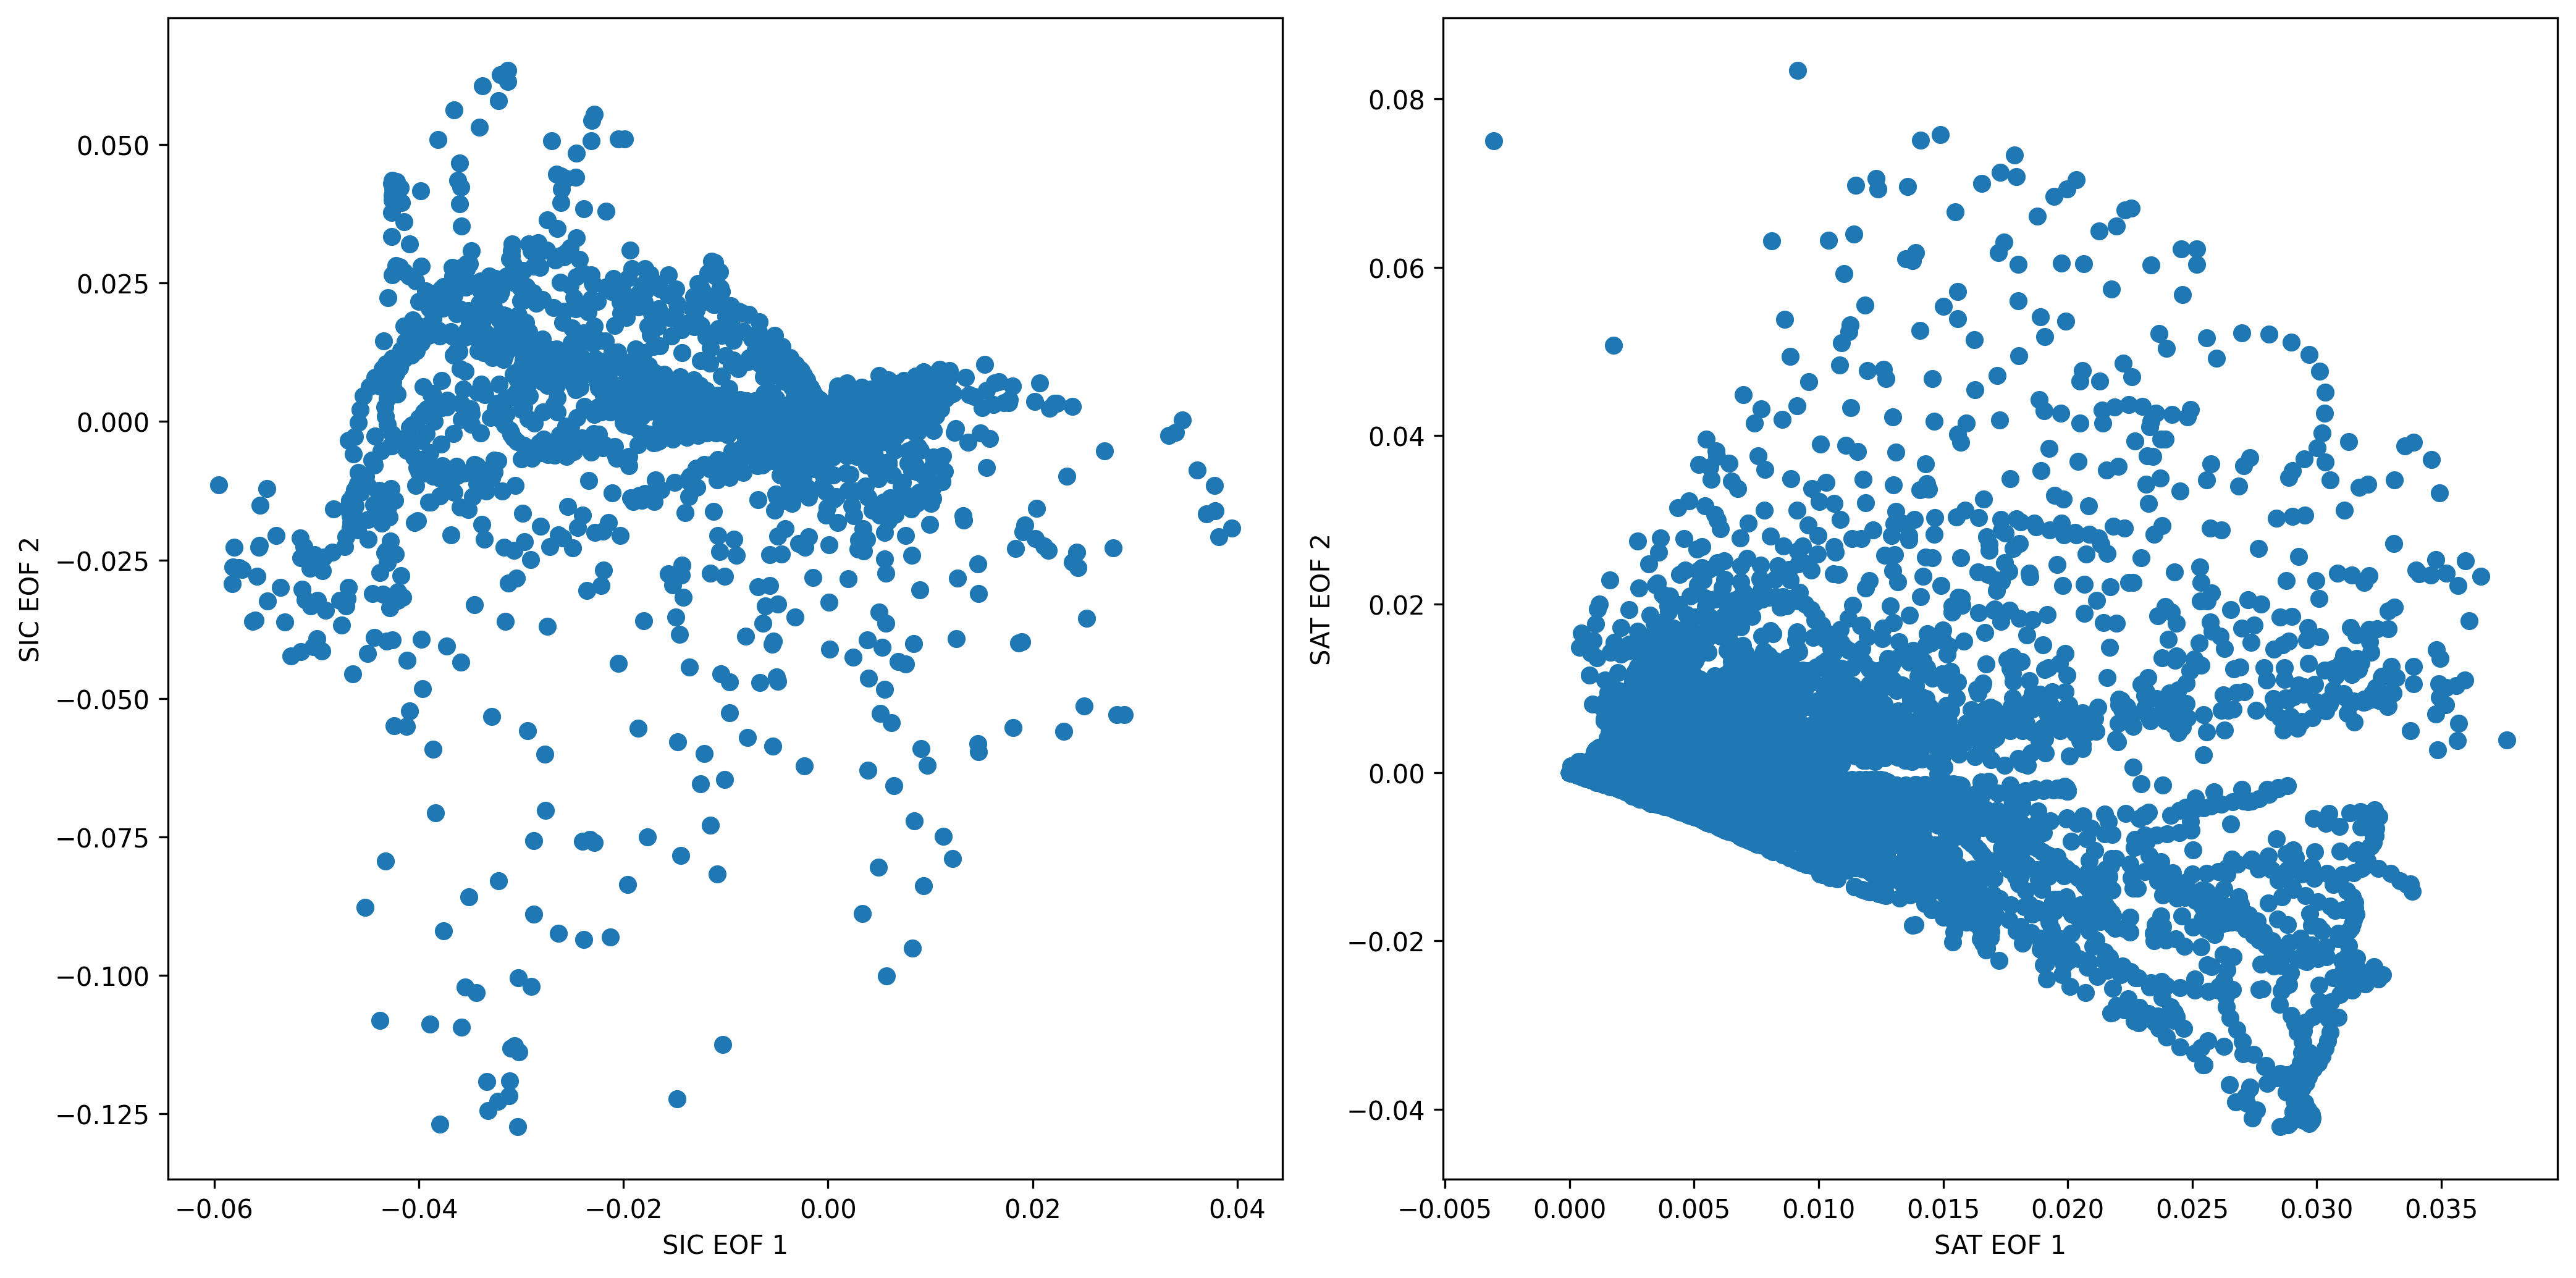

In [10]:


fig, axs = plt.subplots(1, 2, figsize=(14, 7), dpi=300)


axs[0].scatter(EOF1_sic, EOF2_sic)
axs[0].set_xlabel('SIC EOF 1')
axs[0].set_ylabel('SIC EOF 2')


axs[1].scatter(EOF1_sat, EOF2_sat)
axs[1].set_xlabel('SAT EOF 1')
axs[1].set_ylabel('SAT EOF 2')


plt.tight_layout()
plt.show()

# Doing GMM on sat eof1 and sic eof1

In [94]:
import numpy as np
data=np.concatenate((EOF1_sat.reshape(1, 96*144), EOF1_sic.reshape(1, 96*144)), axis=0).T
data.shape

(13824, 2)

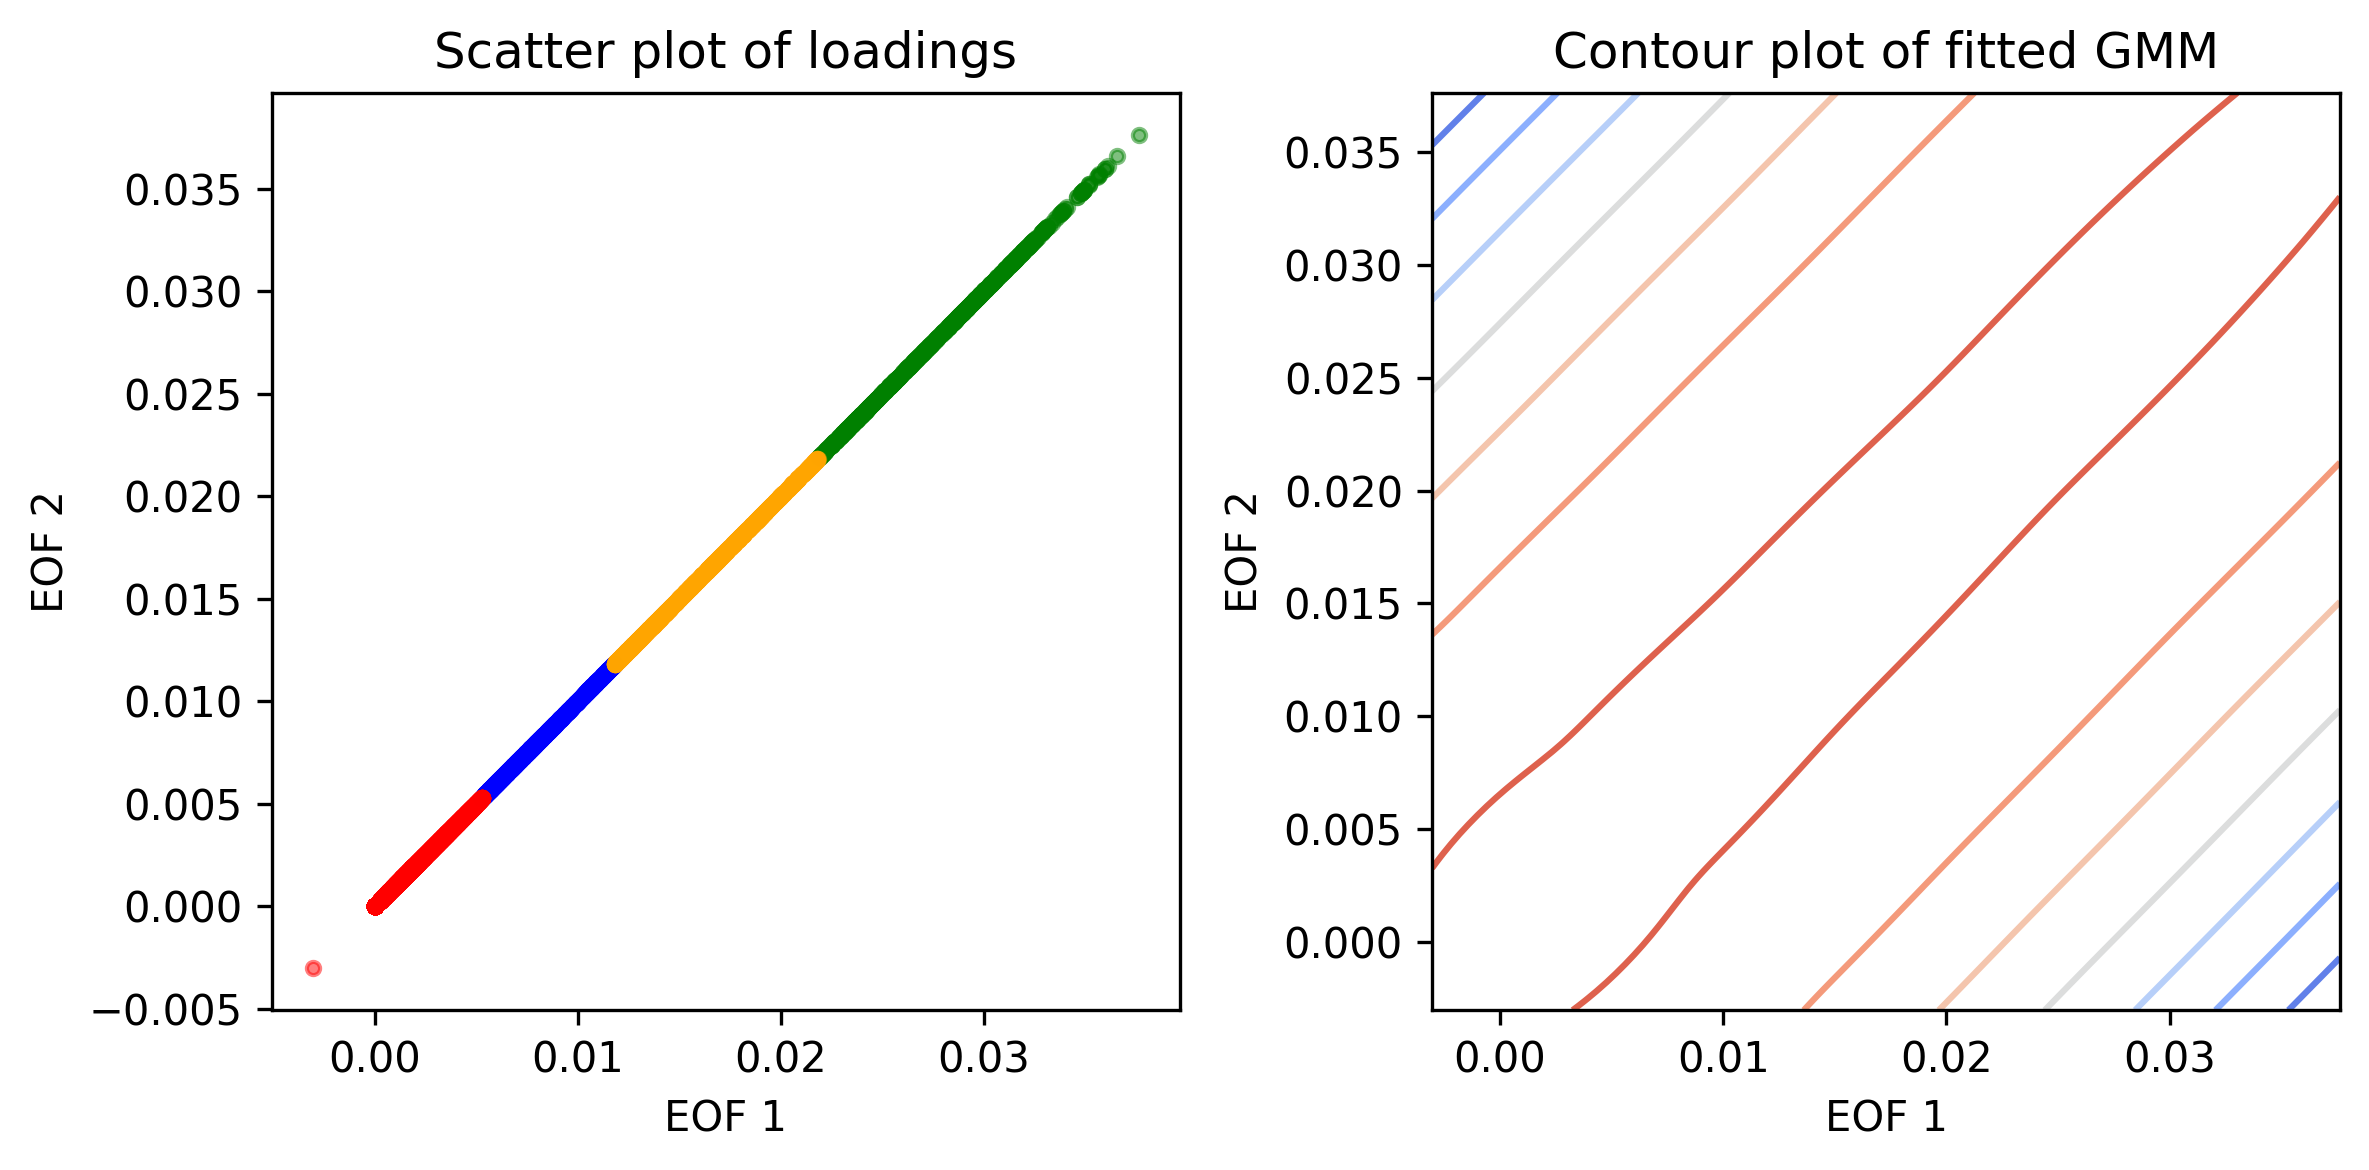

In [95]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.stats import zscore
import numpy as np
from sklearn.mixture import GaussianMixture
import xarray as xr
import matplotlib.pyplot as plt


data=np.concatenate((EOF1_sat.reshape(1, 96*144), EOF1_sic.reshape(1, 96*144)), axis=0).T


colors = ['blue', 'red', 'green', 'orange', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan']

n_components=4

sat_shape=ds_sat_EOFs['sat'].shape

# create a 2D GMM model
gmm_model = GaussianMixture(n_components=n_components, covariance_type='full')

# fit the model to the two columns of PCA scores
gmm_model.fit(data)

# get the predicted class labels for each data point
class_labels = gmm_model.predict(data)

# new_ds=ds_sat.copy()
# add the class labels to the xarray dataset
ds=ds_sat_EOFs.copy()
ds['class_label'] = (('lat', 'lon'), class_labels.reshape(sat_shape[1], sat_shape[2]))

# plot the results
fig, ax = plt.subplots(1, 2, figsize=(8, 4), dpi=300)

# plot the scatter plot of the two columns
for i in range(n_components):
    mask = class_labels == i
    # ax[0].scatter(sat_scores[:, 0][mask], sat_scores[:, 1][mask], s=10, alpha=0.5, color=colors[i % len(colors)])
    ax[0].scatter(data[:, 0][mask], data[:, 1][mask], s=10, alpha=0.5, color=colors[i])

# plot the contour plot of the fitted GMM
x, y = np.meshgrid(np.linspace(np.min(data[:, 0]), np.max(data[:, 0]), 100),
                    np.linspace(np.min(data[:, 1]), np.max(data[:, 1]), 100))
XX = np.array([x.ravel(), y.ravel()]).T
Z = -gmm_model.score_samples(XX)
Z = Z.reshape(x.shape)
ax[1].contour(x, y, Z, cmap='coolwarm_r')

# Add labels and title
ax[0].set_xlabel('EOF 1')
ax[0].set_ylabel('EOF 2')
ax[1].set_xlabel('EOF 1')
ax[1].set_ylabel('EOF 2')
ax[0].set_title('Scatter plot of loadings')
ax[1].set_title('Contour plot of fitted GMM')

plt.tight_layout()
plt.show()


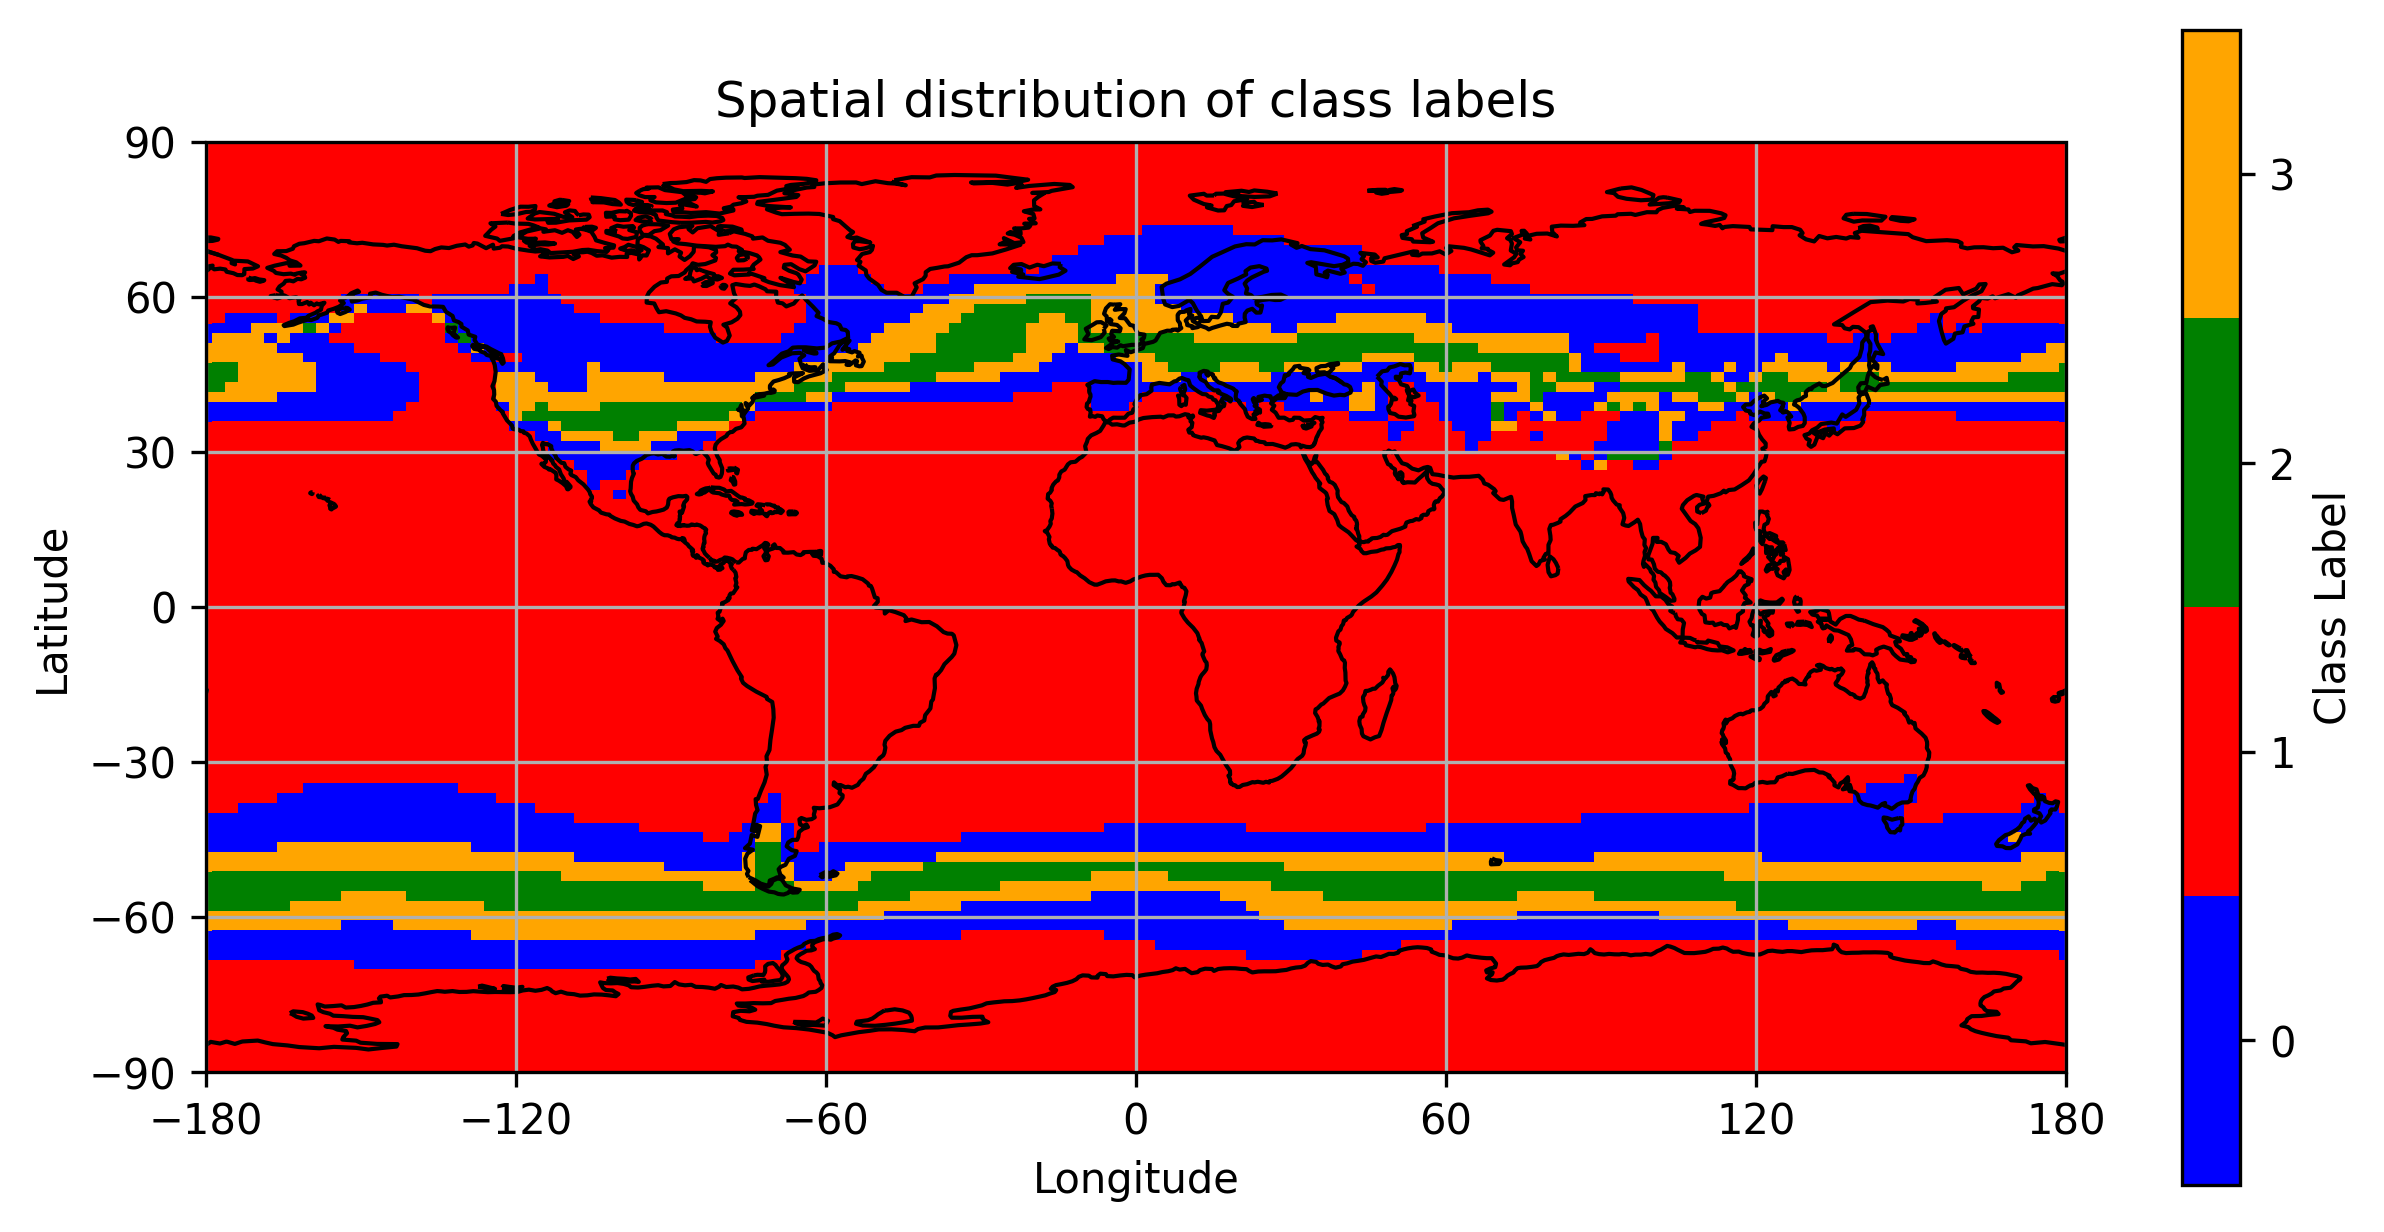

In [96]:
from toolbox import GMM_functions as gf
gf.plot_labels(ds)

# Doing GMM on sat eof 2 and sic eof 2

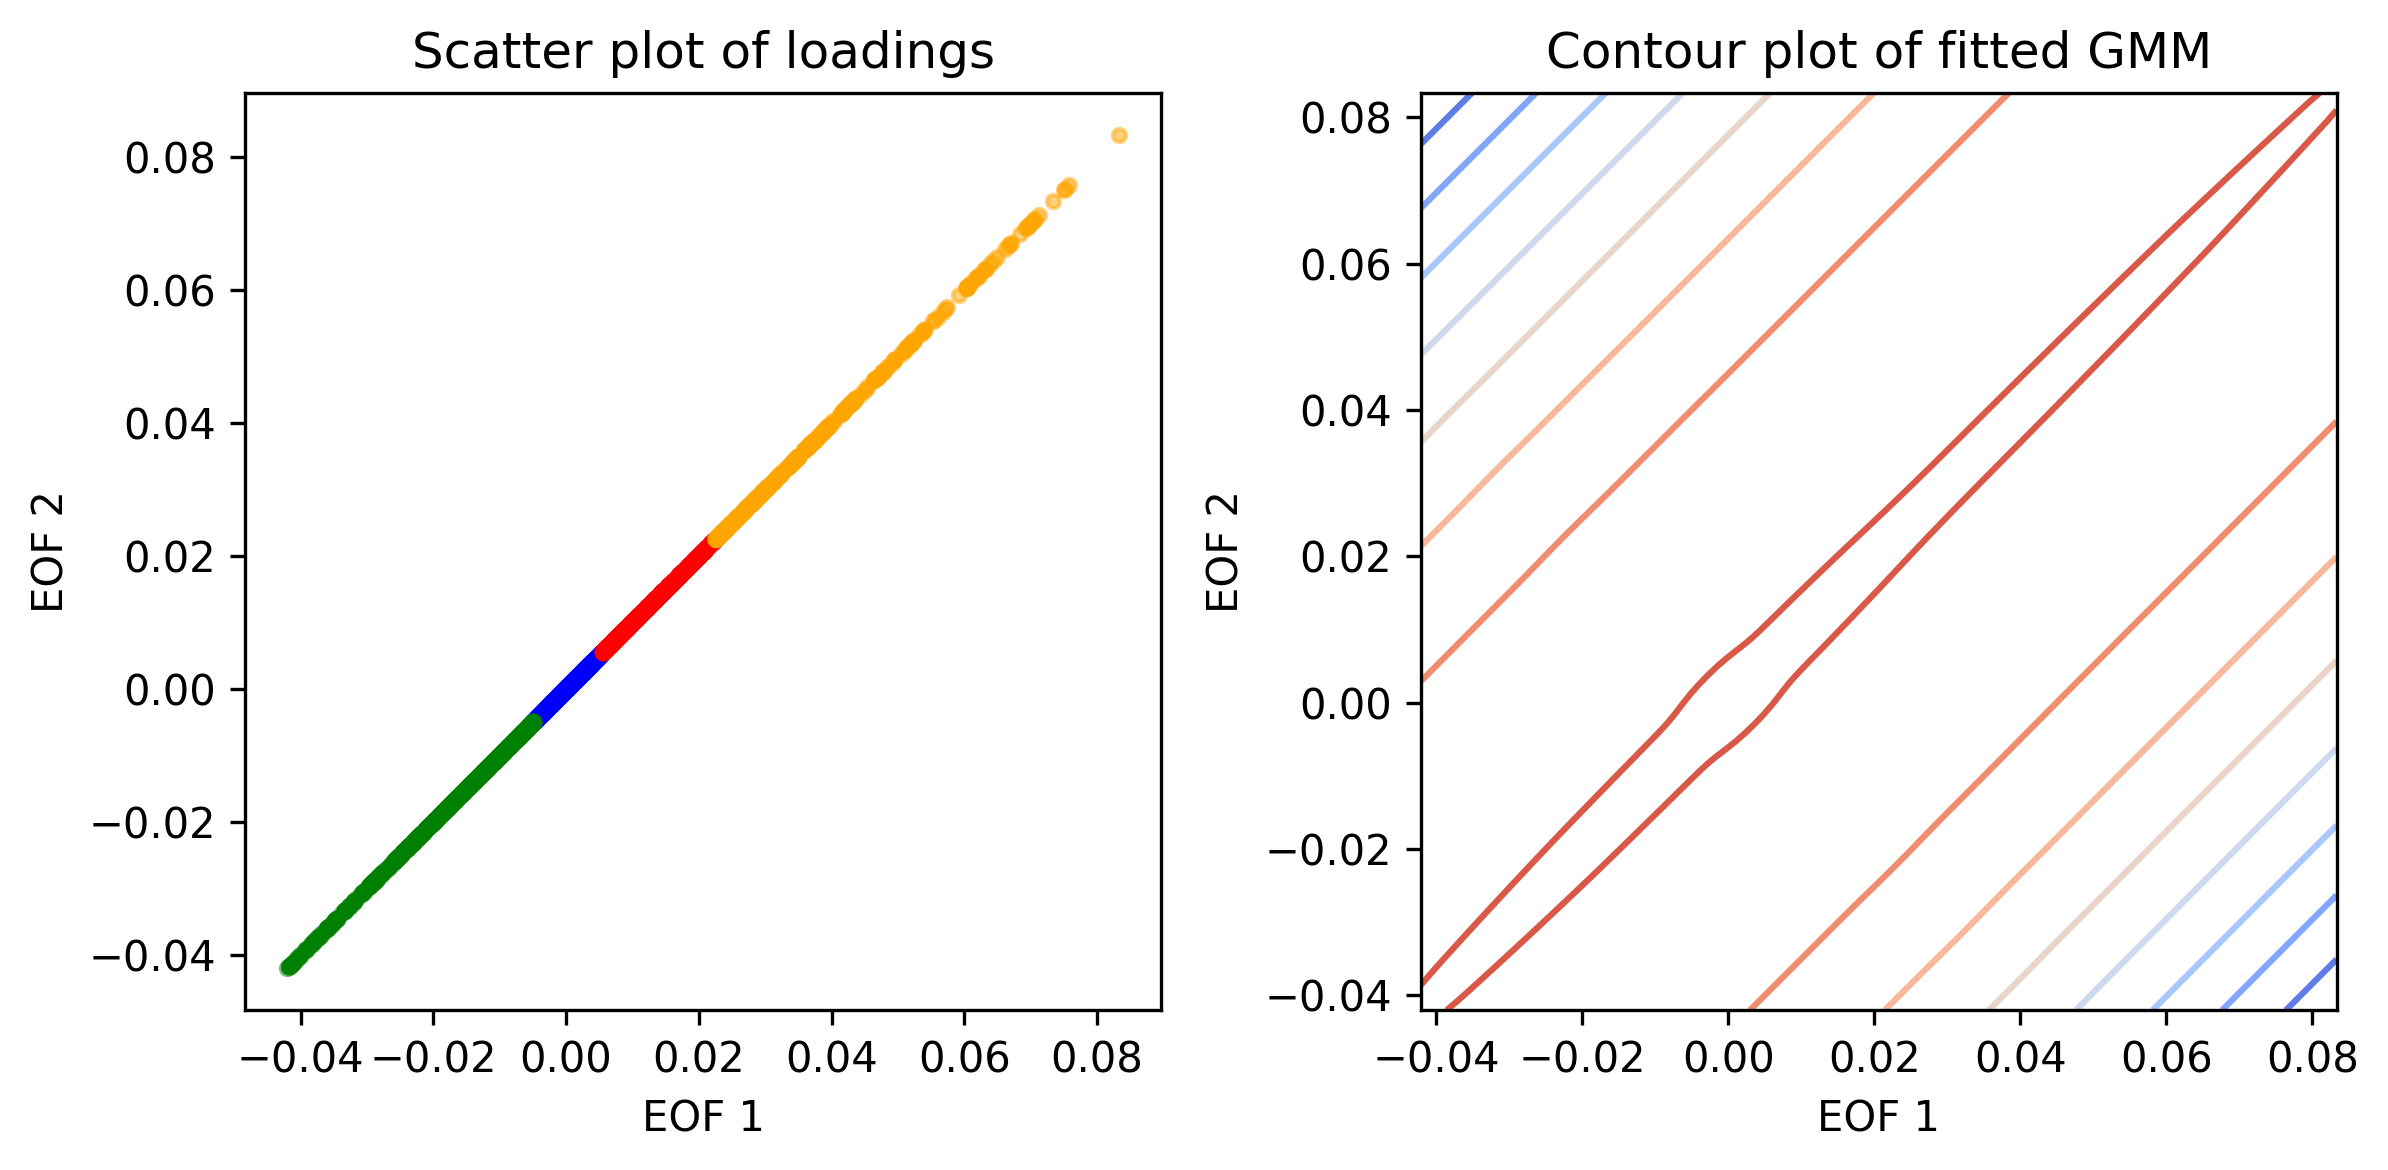

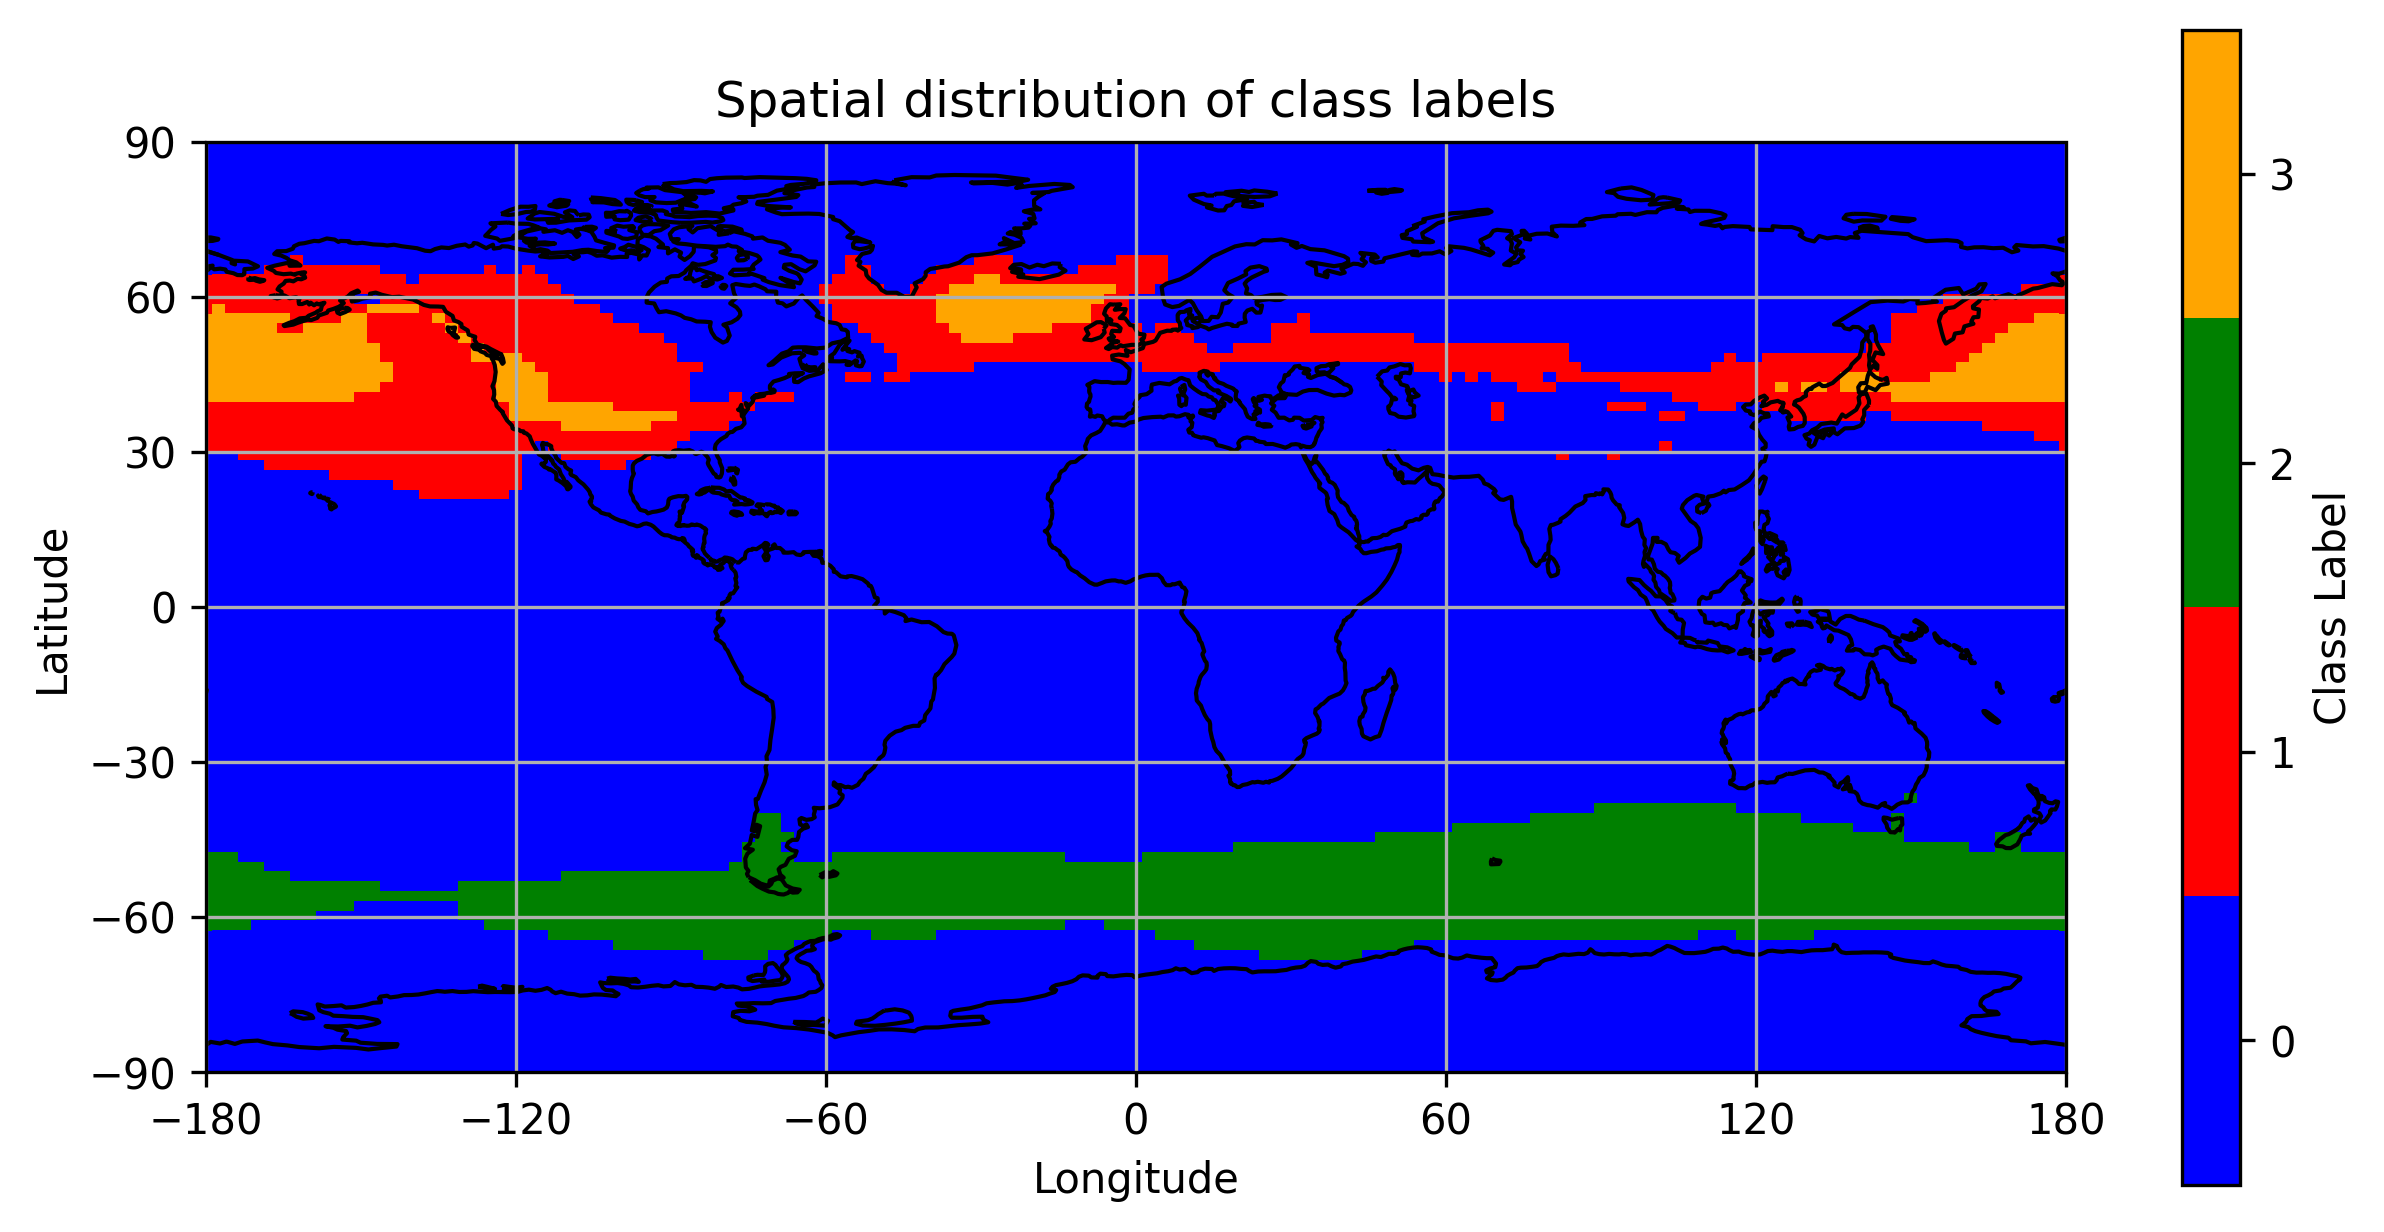

In [97]:
from toolbox import GMM_functions as gf
data=np.concatenate((EOF2_sat.reshape(1, 96*144), EOF2_sic.reshape(1, 96*144)), axis=0).T
ds_eof2=gf.GMM4EOFS(data, ds_sat_EOFs, n_components=4)
gf.plot_labels(ds_eof2)